## Superivised Learning algorthim
Support vector machine are computationally efficient and have high accuarcy. SVM are not effected by outlier and classify data effectivly.
SVM are also know margin vector classifier.

In [3]:
### Imported python libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [7]:
##Importing data 
file_pth='./datasets/spam_email_data'
dataset=loadmat(file_pth)
print(dataset.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [30]:
#The data is stored in form of dictionary 
X_trn=dataset['X']
Y_trn=dataset['y']
n=X_trn.shape[1]
m=Y_trn.size
print('Number of feature of the model n=',format(n))
print('Number of training example of the model m=',m)

Number of feature of the model n= 2
Number of training example of the model m= 51


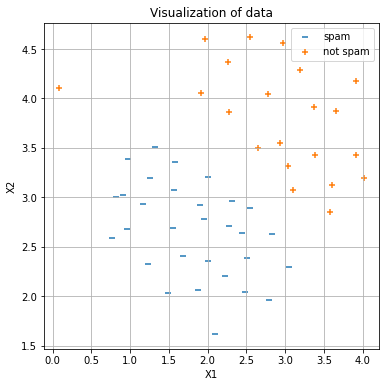

In [36]:
# plotting data for better understanding from visualization 
label0=X_trn[(Y_trn==0).ravel(),:]
label1=X_trn[(Y_trn==1).ravel(),:]
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(label0[:,0],label0[:,1],marker='_',label='spam')
ax.scatter(label1[:,0],label1[:,1],marker='+',label='not spam')
plt.title('Visualization of data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()

###### From the visualization, we can identify that data requires classification method for predition and decision boundary need to be build
Since the data has outliers in it does Support Vector Machine get affected by it is checked. 


In [51]:
## building SVM algorthim, i would be testing two kernel

def linear_kernel(X,Y):
    return (X.dot(Y))

def gaussian_kernel(X,Y,sigma):
    w=X-Y
    z=w.dot(w)
    K=np.exp(-z/(2*(sigma**2)))
    return K
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
k=gaussian_kernel(x1,x2,2)
print('The value gaussian kernel function for sample data',k)
assert(k==0.32465246735834974)

The value gaussian kernel function for sample data 0.32465246735834974


In [99]:
from sklearn import svm
svm_linear=svm.LinearSVC(C=1)
svm_linear.fit(X_trn,Y_trn.ravel())
print('Accuarcy',svm_linear.score(X_trn,Y_trn.ravel()))
svm_linear.coef_
coef = svm_linear.coef_.ravel()
intercept = svm_linear.intercept_.ravel()

Accuarcy 0.5376593279258401


C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


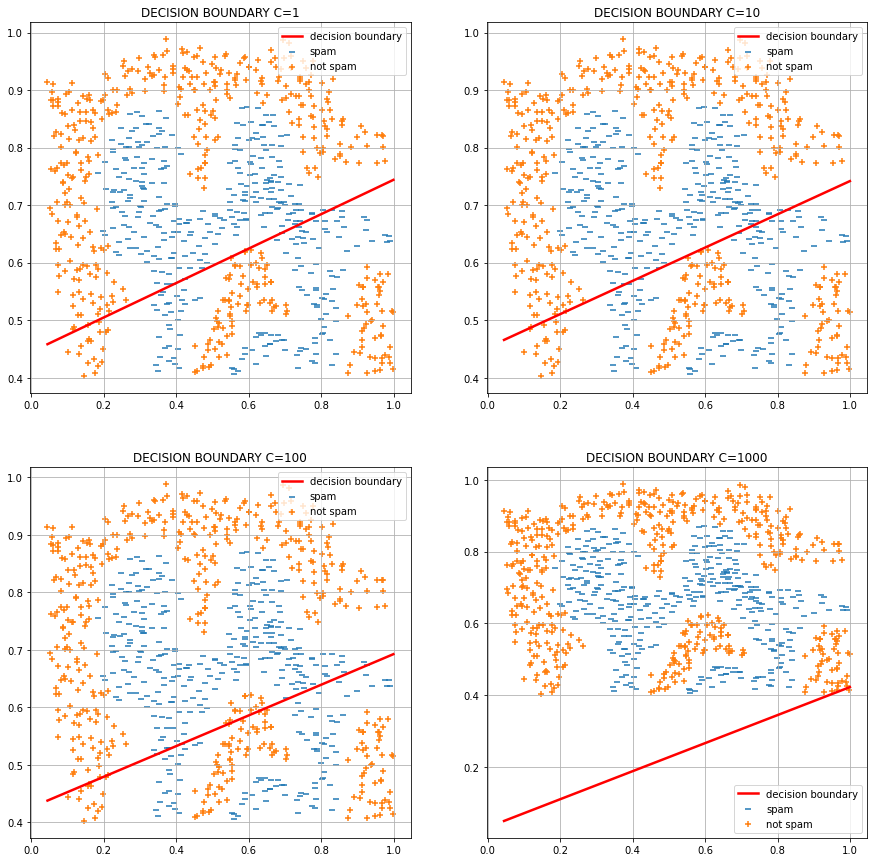

In [100]:
import math as m
C=np.array([1,10,100,1000])
plt.subplots(figsize=(15,15)) 
cols = 2
rows = m.ceil(len(C) / cols)

for index, key in enumerate(C):
    svm_linear=svm.LinearSVC(C=key)
    svm_linear.fit(X_trn,Y_trn.ravel())
    coef = svm_linear.coef_.ravel()
    intercept = svm_linear.intercept_.ravel()
    plt.subplot(rows, cols, index + 1) 
    xp = np.linspace(np.min(X_trn[:, 0]), np.max(X_trn[:, 0]), 100)
    yp = -1.0 * (coef[0] * xp + intercept[0]) / coef[1]
    plt.plot(xp, yp, linestyle='-',label='decision boundary',color='r',linewidth=2.5)
    plt.scatter(label0[:,0],label0[:,1],marker='_',label='spam')
    plt.scatter(label1[:,0],label1[:,1],marker='+',label='not spam')
    plt.title('DECISION BOUNDARY C={}'.format(key))
    plt.legend()
    plt.grid()

### As the value of C increases, the bias decreased but has high variance (Over fitting happens)

In [88]:
##using other kernel funtions
file_pth='./datasets/svm_data2'
dataset=loadmat(file_pth)
print(dataset.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [89]:
#The data is stored in form of dictionary 
X_trn=dataset['X']
Y_trn=dataset['y']
n=X_trn.shape[1]
m=Y_trn.size
print('Number of feature of the model n=',format(n))
print('Number of training example of the model m=',m)

Number of feature of the model n= 2
Number of training example of the model m= 863


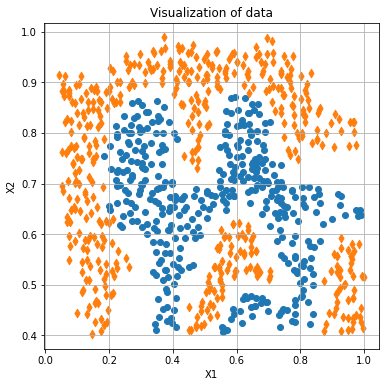

In [101]:
# plotting data for better understanding from visualization 
label0=X_trn[(Y_trn==0).ravel(),:]
label1=X_trn[(Y_trn==1).ravel(),:]
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(label0[:,0],label0[:,1],marker='o')
ax.scatter(label1[:,0],label1[:,1],marker='d')
plt.title('Visualization of data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

### For this kind of data linear kernel cannot be used as they donot yield accurate results, we use gaussian kernel 

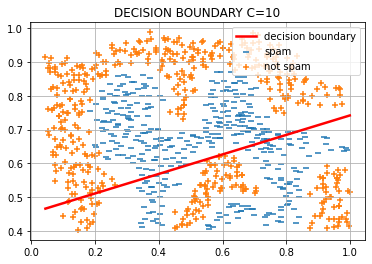

In [105]:
C=10
svm_linear=svm.LinearSVC(C=C)
svm_linear.fit(X_trn,Y_trn.ravel())
coef = svm_linear.coef_.ravel()
intercept = svm_linear.intercept_.ravel()
plt.subplot() 
xp = np.linspace(np.min(X_trn[:, 0]), np.max(X_trn[:, 0]), 100)
yp = -1.0 * (coef[0] * xp + intercept[0]) / coef[1]
plt.plot(xp, yp, linestyle='-',label='decision boundary',color='r',linewidth=2.5)
plt.scatter(label0[:,0],label0[:,1],marker='_',label='spam')
plt.scatter(label1[:,0],label1[:,1],marker='+',label='not spam')
plt.title('DECISION BOUNDARY C={}'.format(C))
plt.legend()
plt.grid()

In [111]:
C=10
gamma=20
svm_gus = svm.SVC(C=C, kernel='rbf', gamma=gamma)
svm_gus.fit(X_trn, Y_trn.ravel())
print ('The accuracy of the model is:', svm_gus.score(X_trn, Y_trn.ravel()))

The accuracy of the model is: 0.9872537659327926


C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: No contour levels were found within the data range.
C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: No contour levels were found within the data range.
C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: No contour levels were found within the data range.
C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: No contour levels were found within the data range.


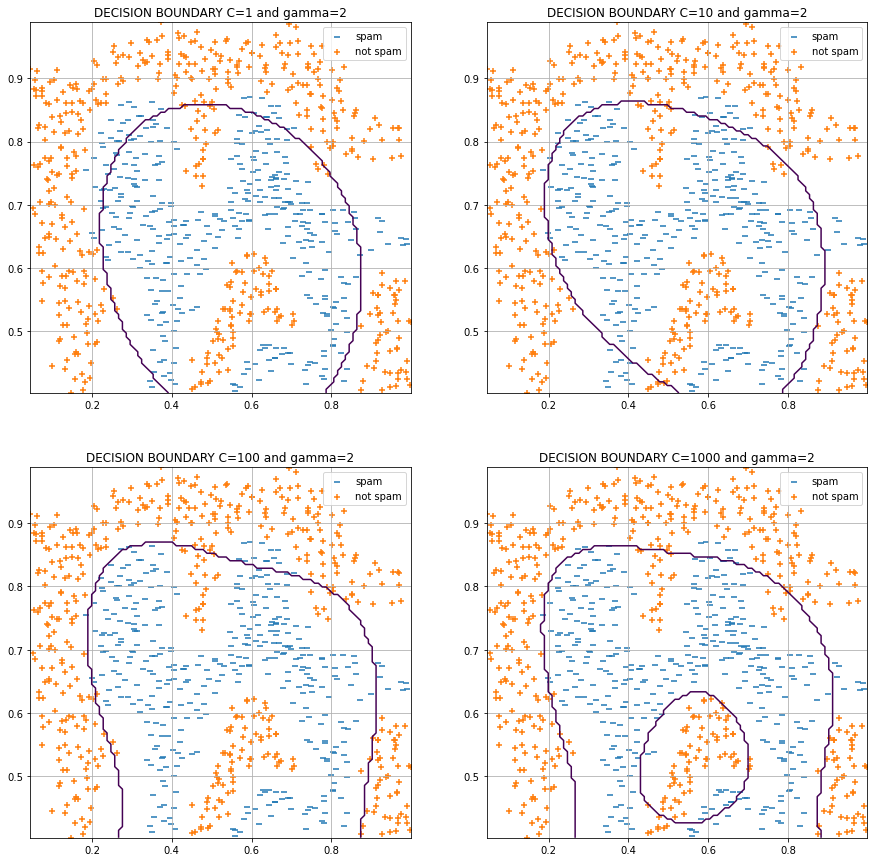

In [117]:
C=np.array([1,10,100,1000])
gamma=2
plt.subplots(figsize=(15,15)) 
cols = 2
rows = m.ceil(len(C) / cols)

for index, key1 in enumerate(C):
    svm_gus = svm.SVC(C=key1, kernel='rbf', gamma=gamma)
    svm_gus.fit(X_trn, Y_trn.ravel())
    x1_plot = np.linspace(np.min(X_trn[:, 0]), np.max(X_trn[:, 0]), 100)
    x2_plot = np.linspace(np.min(X_trn[:, 1]), np.max(X_trn[:, 1]), 100)
    X1, X2 = np.meshgrid(x1_plot, x2_plot)
    vals = np.zeros(X1.shape)
    plt.subplot(rows, cols, index + 1) 
    for i in range(X1.shape[1]):
        X_tmp = np.hstack((X1[:, i:i + 1], X2[:, i:i + 1]))
        vals[:, i] = svm_gus.predict(X_tmp)
    plt.scatter(label0[:,0],label0[:,1],marker='_',label='spam')
    plt.scatter(label1[:,0],label1[:,1],marker='+',label='not spam')
    plt.contour(X1, X2, vals, levels=[0])
    plt.title('DECISION BOUNDARY C={} and gamma={}'.format(key1,gamma))
    plt.legend()
    plt.grid()